In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
# testing code source
import sys
sys.path.append("..")

In [3]:
import atlas_rbm.atlas as atlas
import atlas_rbm.export as export
import atlas_rbm.simulation as simulation

In [4]:
network = '../docs/networks/metabolic_network3.tsv'
data = atlas.read_network(network)

In [5]:
model = atlas.construct_model_from_metabolic_network(network, verbose = False)

In [6]:
# model initial condition
simulation.set_initial.met(model, 'beta_lactose', 'per', 100)
simulation.set_initial.met(model, 'PROTON', 'per', 100)
simulation.set_initial.met(model, 'WATER', 'cyt', 100)

if 'network1' in network:
    simulation.set_initial.cplx(model, 'BETAGALACTOSID_CPLX', 'cyt', 1)
    simulation.set_initial.cplx(model, 'GALACTOACETYLTRAN_CPLX', 'cyt', 1)
    simulation.set_initial.cplx(model, 'LACY_MONOMER', 'mem', 1)

if 'network2' in network:
    simulation.set_initial.prot(model, 'lacZ', 'cyt', 1)
    simulation.set_initial.prot(model, 'lacA', 'cyt', 1)
    simulation.set_initial.prot(model, 'lacY', 'mem', 1)

if 'network3' in network:
    simulation.set_initial.prot(model, 'lacY', 'mem', 1)
    simulation.set_initial.pattern(model, 
        "prot(name='lacZ', loc='cyt', dna = None, met = None, prot = None, rna = None, up = None, dw = 1) % " + \
        "prot(name='lacZ', loc='cyt', dna = None, met = None, prot = None, rna = None, up = 1, dw = 2) % " + \
        "prot(name='lacZ', loc='cyt', dna = None, met = None, prot = None, rna = None, up = 2, dw = 3) % " + \
        "prot(name='lacZ', loc='cyt', dna = None, met = None, prot = None, rna = None, up = 3, dw = None)", 
        'galactosidase', 1)
    simulation.set_initial.pattern(model, 
        "prot(name='lacA', loc='cyt', dna = None, met = None, prot = None, rna = None, up = None, dw = 1) % " + \
        "prot(name='lacA', loc='cyt', dna = None, met = None, prot = None, rna = None, up = 1, dw = 2) % " + \
        "prot(name='lacA', loc='cyt', dna = None, met = None, prot = None, rna = None, up = 2, dw = None)",
        'acetyltransferase', 1)

In [7]:
bng = '/opt/git-repositories/bionetgen.RuleWorld/bng2/'
kasim = '/opt/git-repositories/KaSim4.Kappa-Dev/'
export.to_bngl(model, 'test.bngl', bng)
export.to_kappa(model, 'test.kappa')

In [8]:
data1 = simulation.ode(model, path = bng)
data2 = simulation.ssa(model, start = 0, finish = 2, points = 200, n_runs = 20, path = bng)
data3 = simulation.kasim(model, start = 0, finish = 2, points = 200, n_runs = 20, path = kasim)

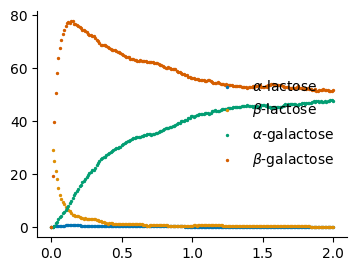

In [9]:
import seaborn
import matplotlib.pyplot as plt

palette = seaborn.color_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.metabolite(data2['avrg'], 'alpha_lactose', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[0], 'label' : r'$\alpha$-lactose'})
simulation.plot.metabolite(data2['avrg'], 'beta_lactose', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[1], 'label' : r'$\beta$-lactose'})
simulation.plot.metabolite(data2['avrg'], 'alpha_GALACTOSE', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[2], 'label' : r'$\alpha$-galactose'})
simulation.plot.metabolite(data2['avrg'], 'beta_GALACTOSE', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[3], 'label' : r'$\beta$-galactose'})

seaborn.despine()

In [13]:
import pyvipr.pysb_viz as viz
viz.sp_view(model)

Viz(data=<Model 'atlas_rbm.construct_model_from_metabolic_network' (monomers: 2, rules: 18, parameters: 107, e…

In [14]:
viz.sp_comm_louvain_view(model, layout_name='klay', random_state=1)

Viz(data=<Model 'atlas_rbm.construct_model_from_metabolic_network' (monomers: 2, rules: 18, parameters: 107, e…

In [15]:
viz.sp_rxns_bidirectional_view(model)

Viz(data=<Model 'atlas_rbm.construct_model_from_metabolic_network' (monomers: 2, rules: 18, parameters: 107, e…

In [16]:
viz.sp_rules_view(model, layout_name='cose-bilkent')

Viz(data=<Model 'atlas_rbm.construct_model_from_metabolic_network' (monomers: 2, rules: 18, parameters: 107, e…

In [17]:
viz.sp_rules_fxns_view(model, layout_name='fcose')

Viz(data=<Model 'atlas_rbm.construct_model_from_metabolic_network' (monomers: 2, rules: 18, parameters: 107, e…

In [19]:
# viz.sp_rules_mod_view(model, layout_name='fcose')